# Aula 04 - Séries Temporais

# Estacionariedade

### Prof. Dr. Vitor Alex Oliveira Alves

# Séries Temporais e Processos Estocásticos

A sequência de variáveis ​​aleatórias $\{Y_t : t = 0, ±1, ±2, ±3, \cdots\}$ é chamada de *processo estocástico* e serve como modelo para uma série temporal observada.

Sabe-se que a estrutura probabilística completa de tal processo é determinada pelo conjunto de distribuições de todas as coleções finitas dos $Y'$s. Felizmente, não teremos que lidar explicitamente com essas distribuições multivariadas.

Muitas das informações nessas distribuições conjuntas podem ser descritas em termos de médias, variâncias e covariâncias, os chamados primeiro e segundo momentos das distribuições. Se as distribuições conjuntas dos $Y'$s forem
distribuições normais multivariadas, então o primeiro e segundo momentos determinam completamente todas as distribuições conjuntas.

# Médias, Variâncias e Covariâncias

Para um processo estocástico $\{Y_t : t = 0, ±1, ±2, ±3, \cdots\}$, a *função média* é definida por

$$\mu_t=E(Y_t), \text{para } t=0,\pm1,\pm2,\cdots$$

Ou seja, $\mu_t$ é apenas o valor esperado do processo no instante $t$. Em geral, $\mu_t$ pode assumir valores diferentes em cada instante de tempo.

A *função de autocovariância* $\gamma_{t,s}$ é definida por

$$\gamma_{t,s}=Cov(Y_t,Y_s)=E[(Y_t-\mu_t)(Y_s-\mu_s)]=E(Y_tY_s)-\mu_t\mu_s,\text{para } t=0,\pm1,\pm2,\cdots$$

A *função de autocorrelação* $\rho_{t,s}$ (já vista na aula passada) também assume a forma

$$\rho_{t,s}=Corr(Y_t,Y_s)=\frac{Cov(Y_t,Y_s)}{\sqrt{Var(Y_t)Var(Y_s)}}=\frac{\gamma_{t,s}}{\sqrt{\gamma_{t,t}\gamma_{s,s}}}, \text{para } t=0,\pm1,\pm2,\cdots$$

As seguintes propriedades são decorrentes das definições anteriores:

$$\gamma_{t,t}=Var(Y_t)\\\gamma_{t,s}=\gamma_{s,t}\\\vert\gamma_{t,s}\vert\leq\sqrt{\gamma_{t,t}\gamma_{s,s}}\\\rho_{t,t}=1\\\rho_{t,s}=\rho_{s,t}\\\vert\rho_{t,s}\vert\leq 1$$

Valores de $\rho_{t,s}$ próximos de $\pm1$ indicam forte dependência (linear) e valores próximos de zero indicam fraca dependência (linear). Se $\rho_{t,s}=0$, dizemos que $Y_t$ e $Y_s$ são processos descorrelacionados.

# Estacionariedade

Para fazer inferências estatísticas sobre a estrutura de um processo estocástico com base em um registro observado desse processo, geralmente devemos fazer algumas hipóteses simplificadoras (presumivelmente
razoáveis) sobre essa estrutura. A mais importante de tais hipóteses é a da *estacionariedade*.

A ideia básica da estacionariedade consiste em que as leis de probabilidade que governam o comportamento do processo não mudam ao longo do tempo. De certo modo, o processo está em "equilíbrio estatístico".

Especificamente, um processo ${Y_t}$ é dito *estritamente estacionário*
se a distribuição conjunta de $Y_{t_1}, Y_{t_2},\cdots,Y_{t_n}$for igual à distribuição conjunta de $Y_{t_1-k}, Y_{t_2-k},\cdots, Y_{t_n-k}$
para todas as escolhas de pontos de tempo $t_1, t_2,\cdots, t_n$ e todas as escolhas de tempo atraso $k$.

Uma definição similar, embora matematicamente mais fraca, é a seguinte:

**Definição:** Um processo estocástico ${Y_t}$ é dito *fracamente estacionário* ou *estacionário de segunda ordem* se:

* A função média é constante ao longo do tempo
* $\gamma_{t,t-k}=\gamma_{0,k}$ para todo tempo $t$ e todo atraso $k$


# Testes de Estacionariedade

Vamos criar séries temporais aleatórias e aplicar testes de hipótese para verificar a properiedade da estacionariedade.

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Padronização do tamanho das figuras
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

In [7]:
# Criação da série temporal - Pandas DataFrame
np.random.seed(10)
data1 = np.random.normal(0, 1, 41)
print(data1)
df_data1 = pd.DataFrame(data1)
print(f'\nFormato dos dados = {df_data1.shape}')
df_data1.columns = ['valores']
df_data1.head()

[ 1.3315865   0.71527897 -1.54540029 -0.00838385  0.62133597 -0.72008556
  0.26551159  0.10854853  0.00429143 -0.17460021  0.43302619  1.20303737
 -0.96506567  1.02827408  0.22863013  0.44513761 -1.13660221  0.13513688
  1.484537   -1.07980489 -1.97772828 -1.7433723   0.26607016  2.38496733
  1.12369125  1.67262221  0.09914922  1.39799638 -0.27124799  0.61320418
 -0.26731719 -0.54930901  0.1327083  -0.47614201  1.30847308  0.19501328
  0.40020999 -0.33763234  1.25647226 -0.7319695   0.66023155]

Formato dos dados = (41, 1)


,valores
0,1.331587
1,0.715279
2,-1.545400
3,-0.008384
4,0.621336


DatetimeIndex(['1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31',
               '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31',
               '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')


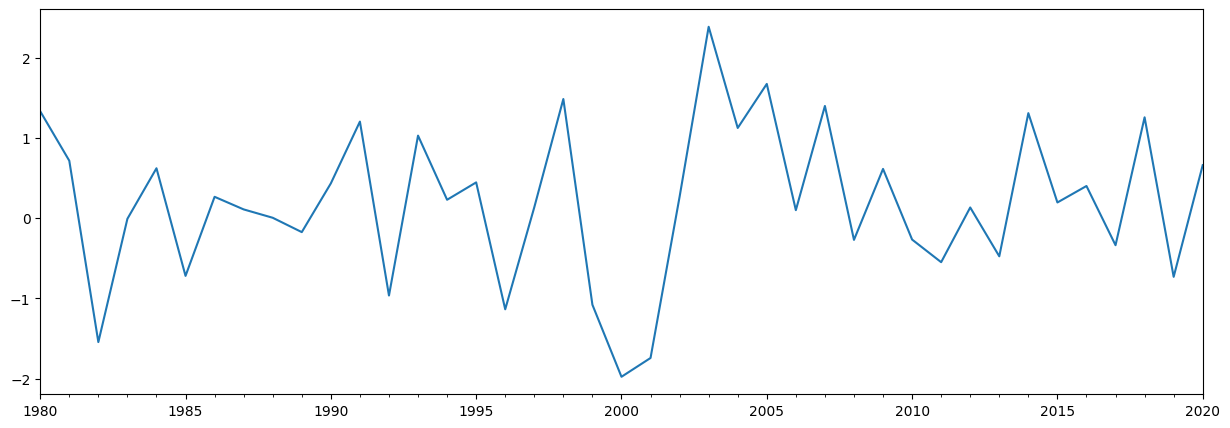

In [11]:
# Criação das estampas temporais
indice = pd.date_range('1980', periods=len(df_data1), freq='Y')
print(indice)
# Criação da série temnporal - Pandas Series
serie_data1 = pd.Series(df_data1['valores'].values, index=indice)
# Visualização da série
serie_data1.plot()
plt.show()

# Teste KPSS

O teste KPSS, abreviação de Kwiatkowski-Phillips-Schmidt-Shin, é um tipo de teste de raiz unitária que testa a estacionariedade de uma determinada série em torno de uma tendência determinística.

Nesse teste, temos:

* $H_0:$ O processo não é estacionário
* $H_a:$ O processo é estacionário

A saída do teste KPSS é uma tupla com 4 elementos:

* Estatística KPSS
* valor-p
* Número de atrasos (*lags*) usados ​​pelo teste
* Valores críticos, aos níveis de significvância de 1%, 2,5%, 5% e 10%

O valor-p relatado pelo teste é a pontuação de probabilidade com base na qual decidimos se rejeitamos ou não a hipótese nula. Se o valor-p for menor que um nível $\alpha$ predefinido (normalmente 0,05), aceitamos a hipótese nula.

A estatística KPSS é a estatística de teste real que é calculada durante a execução do teste. Para aceitarmos a hipótese nula, a estatística de teste deve ser maior que os valores críticos fornecidos. Se for de fato maior que o valor crítico alvo, isso deve refletir automaticamente em um valor-p baixo.

Ou seja, se o valor p for menor que 0,05, a estatística KPSS será maior que o valor crítico de 5%.

Por fim, o número de defasagens informado pela função é o número de defasagens da série que foi efetivamente utilizada pela equação do modelo do teste KPSS.

Em resumo:

**$H_0:$ O processo não é estacionário: estatística do teste > valor crítico**

**$H_a:$ O processo é estacionário:  estatística do teste < valor crítico**

In [25]:
import statsmodels.tsa.stattools
import warnings
warnings.filterwarnings('ignore')

# Teste KPSS
kpss = statsmodels.tsa.stattools.kpss(serie_data1)
print('*** Teste KPSS ***')
print('Estatística do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('número de lags: {}'.format(kpss[2]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))
if kpss[0] > kpss[3]['5%']:
  print('CONCLUSÃO: Processo NÃO Estacionário ao nível de significância de 5%')
else:
  print('CONCLUSÃO: Processo Estacionário ao nível de significância de 5%')


*** Teste KPSS ***
Estatítica do teste: 0.0686
p_valor: 0.1000
número de lags: 0
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
CONCLUSÃO: Processo Estacionário ao nível de significâmcia de 5%


# Teste DF

Uma outra maneira de testar se uma série temporal é estacionária é realizar um teste de Dickey-Fuller aumentado, que usa as seguintes hipóteses nula e alternativa:

* $H_0:$ A série temporal não é estacionária. Em outras palavras, a série possui alguma estrutura interna dependente do tempo.
* $H_a:$ A série temporal é estacionária.

Se o valor-p do teste for menor que algum nível de significância (por exemplo, $\alpha=0,05$), podemos rejeitar a hipótese nula e concluir que a série temporal é estacionária. Ou seja:

**$H_0:$ O processo não é estacionário: estatística do teste > valor crítico**

**$H_a:$ O processo é estacionário:  estatística do teste < valor crítico**

O retorno do teste DF é similar àquele descrito para o teste KPSS.

In [30]:
# Teste DF
teste_df = statsmodels.tsa.stattools.adfuller(serie_data1)
print('*** Teste DF ***')
print('Estatística do teste: {:.4f}'.format(teste_df[0]))
print('p_valor: {:.8f}'.format(teste_df[1]))
print('Valores Críticos:')
for chave, valor in teste_df[4].items():
   print('{}: {:.4f}'.format(chave, valor))
if teste_df[0] > teste_df[4]['5%']:
  print('CONCLUSÃO: Processo NÃO Estacionário ao nível de significância de 5%')
else:
  print('CONCLUSÃO: Processo Estacionário ao nível de significância de 5%')

*** Teste DF ***
Estatística do teste: -5.8642
p_valor: 0.00000034
Valores Críticos:
1%: -3.6056
5%: -2.9371
10%: -2.6070
CONCLUSÃO: Processo Estacionário ao nível de significâmcia de 5%


# Outro exemplo - Total mensal de passageiros

Vamos examinar a estacionariedade da série temporal que registra o total de passageiros em companhias áereas internacionais de 1949 a 1960. Os dados estão contidos no arquivo AirPassengers.csv.

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
# Leitura do arquivo
aereo = pd.read_csv('/content/drive/MyDrive/Datasets/AirPassengers.csv')
aereo.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64


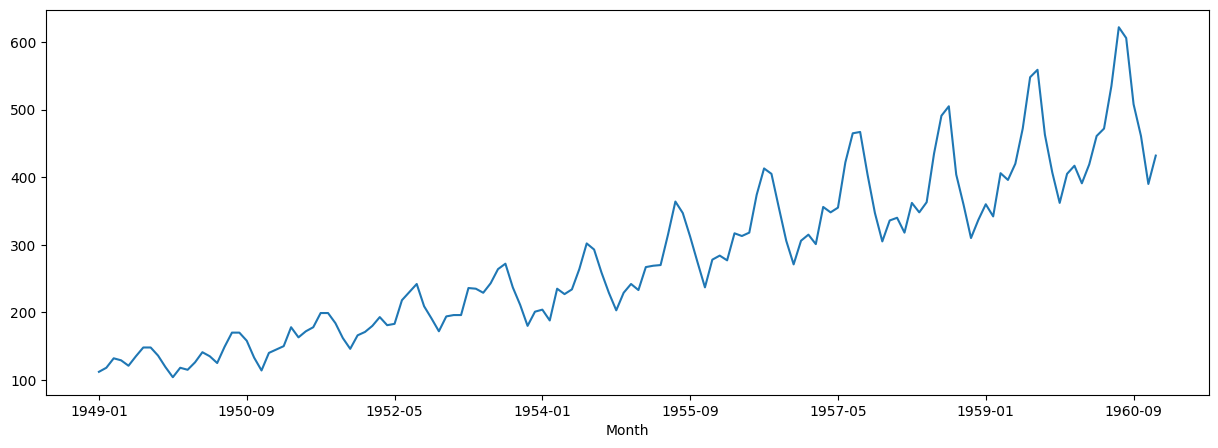

In [34]:
# Criação da série temporal
serie_aereo = pd.Series(aereo['#Passengers'].values, index=aereo['Month'])
print(serie_aereo)
# Visualização da série
serie_aereo.plot()
plt.show()

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

**$H_0:$ O processo não é estacionário: estatística do teste > valor crítico**

**$H_a:$ O processo é estacionário:  estatística do teste < valor crítico**

In [35]:
# Teste KPSS
kpss = statsmodels.tsa.stattools.kpss(serie_aereo)
print('*** Teste KPSS ***')
print('Estatística do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('número de lags: {}'.format(kpss[2]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))
if kpss[0] > kpss[3]['5%']:
  print('CONCLUSÃO: Processo NÃO Estacionário ao nível de significância de 5%')
else:
  print('CONCLUSÃO: Processo Estacionário ao nível de significância de 5%')

*** Teste KPSS ***
Estatística do teste: 1.6513
p_valor: 0.0100
número de lags: 8
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390
CONCLUSÃO: Processo NÃO Estacionário ao nível de significâmcia de 5%


Teste df (Dickey Fuller)

**$H_0:$ O processo não é estacionário: estatística do teste > valor crítico**

**$H_a:$ O processo é estacionário:  estatística do teste < valor crítico**

In [38]:
# Teste DF
teste_df = statsmodels.tsa.stattools.adfuller(serie_aereo)
print('*** Teste DF ***')
print('Estatística do teste: {:.4f}'.format(teste_df[0]))
print('p_valor: {:.8f}'.format(teste_df[1]))
print('Valores Críticos:')
for chave, valor in teste_df[4].items():
   print('{}: {:.4f}'.format(chave, valor))
if teste_df[0] > teste_df[4]['5%']:
  print('CONCLUSÃO: Processo NÃO Estacionário ao nível de significância de 5%')
else:
  print('CONCLUSÃO: Processo Estacionário ao nível de significância de 5%')

*** Teste DF ***
Estatística do teste: 0.8154
p_valor: 0.99188024
Valores Críticos:
1%: -3.4817
5%: -2.8840
10%: -2.5788
CONCLUSÃO: Processo NÃO Estacionário ao nível de significâmcia de 5%
